# 📘 Introduction

In this notebook, we analyze and compare global holidays from 2025 to 2035 using both Natural Language Processing (NLP) and Time Series Analysis techniques.  
The goal is to explore holiday patterns across countries, understand the semantic similarity between holiday descriptions, and classify holiday types (national, religious, cultural, etc.).

We will:
- Perform exploratory data analysis (EDA)
- Apply NLP techniques to process and analyze holiday descriptions
- Conduct time series analysis to explore yearly and country-level trends
- Combine results to gain insights into global holiday behavior


# 📊 Data Overview

The dataset contains information about global holidays from 2025 to 2035.  
It includes key fields such as:

- **Date** — The date of each holiday  
- **type** — The category or type of holiday (e.g., National, Religious, Cultural)  
- **description** — A textual description of the holiday  
- **country** — The country where the holiday occurs  

We will first load the dataset, inspect its structure, and clean any missing or duplicate records.

In [8]:
!pip install nltk

In [36]:
# ===============================
#  Importing Libraries
# ===============================

# --- System & File Handling ---
import os
import re
from collections import Counter

# --- Data Analysis ---
import numpy as np
import pandas as pd

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Natural Language Processing (NLP) ---
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# --- Kaggle Environment: list input files ---
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# --- Visualization Settings ---
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

/kaggle/input/events-and-holidays-2025-2035/Global_Holidays_2025_2035.csv


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [25]:
# ===============================
#  Machine Learning & NLP Modeling
# ===============================

# --- Data Splitting ---
from sklearn.model_selection import train_test_split

# --- Text Vectorization ---
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Classification Model ---
from sklearn.linear_model import LogisticRegression

# --- Evaluation Metrics ---
from sklearn.metrics import classification_report

# **Load data**

In [26]:
# ===============================
# Load and Inspect the Dataset
# ===============================

# Load the dataset
df = pd.read_csv('/kaggle/input/events-and-holidays-2025-2035/Global_Holidays_2025_2035.csv')

# Display first few rows
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country,Year,Date,Holiday_Name,Local_Name,Type,Description
0,IN,2025,2025-01-01,New Year's Day,NaN,Optional holiday,New Year’s Day is celebrated many countries su...
1,IN,2025,2025-01-02,Last day of Hanukkah,NaN,Observance,"Hanukkah, also known as Chanukah or the Festiv..."
2,IN,2025,2025-01-06,Guru Govind Singh Jayanti,NaN,Optional holiday,Guru Gobind Singh Jayanti is the Sikh annual c...
3,IN,2025,2025-01-13,Lohri,NaN,Observance,Lohri is a observance in India
4,IN,2025,2025-01-14,Pongal,NaN,"Hinduism, Optional holiday","Many southern states in India, particularly Ta..."


## 🧹 Data Cleaning

Before proceeding with analysis, let's clean the dataset by:
- Checking for missing values  
- Removing unnecessary columns  
- Converting the `Date` column to a proper datetime format  
- Dropping missing or duplicate records  


In [27]:
# Check general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10540 entries, 0 to 10539
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       10540 non-null  object 
 1   Year          10540 non-null  int64  
 2   Date          10540 non-null  object 
 3   Holiday_Name  10540 non-null  object 
 4   Local_Name    0 non-null      float64
 5   Type          10540 non-null  object 
 6   Description   10485 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 576.5+ KB


In [28]:
# Check missing values
df.isnull().sum()

Country             0
Year                0
Date                0
Holiday_Name        0
Local_Name      10540
Type                0
Description        55
dtype: int64

In [29]:
# Drop unnecessary column
df= df.drop(columns=['Local_Name'])

In [30]:
# Convert Date column to datetime
df['Date']= pd.to_datetime(df['Date'], errors='coerce')

In [32]:
# Drop rows with missing essential fields
df.dropna(subset=['Date', 'Country', 'Description'], inplace=True)

In [33]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# 📈 Time Series Analysis

Here, we analyze holiday trends over time:
- The share of each holiday type (National, Religious, Cultural) across years
- Comparison of holiday counts between countries
- Temporal shifts in holiday distributions

We visualize yearly trends and explore changes in global holiday patterns between 2025 and 2035.

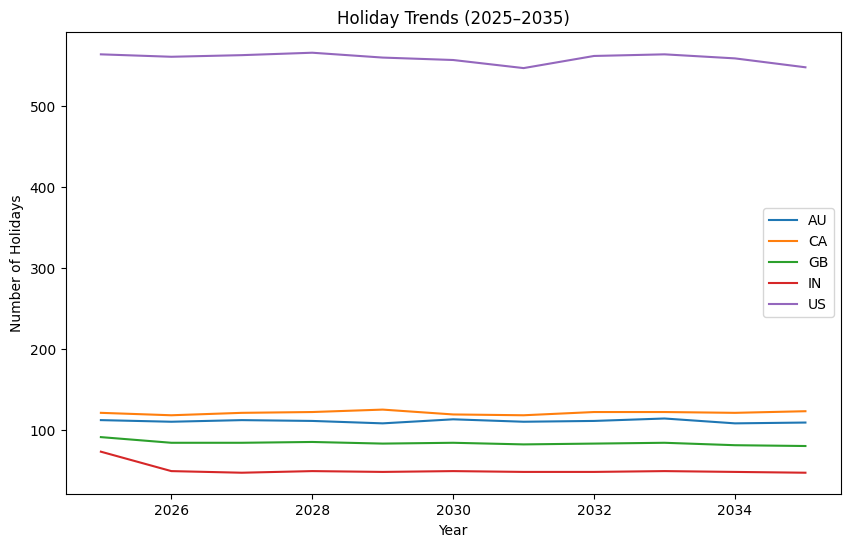

In [34]:
# ===============================
# Holiday Trends by Country
# ===============================

# Extract the year from the date column
df['Year'] = df['Date'].dt.year

# Group by Country and Year to count holidays
trend = df.groupby(['Country', 'Year']).size().reset_index(name='holiday_count')

# Plot holiday trends
plt.figure(figsize=(10,6))

for country in trend['Country'].unique():
    subset = trend[trend['Country'] == country]
    plt.plot(subset['Year'], subset['holiday_count'], marker='o', label=country)

plt.legend(title='Country')
plt.title('📅 Holiday Trends (2025–2035)')
plt.xlabel('Year')
plt.ylabel('Number of Holidays')
plt.grid(True)
plt.show()


# 🧠 NLP & Text Classification

This section focuses on Natural Language Processing (NLP) tasks applied to the `description` field.

We:
- Clean and preprocess the text data (tokenization, stopword removal, lemmatization)
- Use TF-IDF to represent the text numerically
- Build a simple classification model to predict the holiday type
- Later, we use BERT-based embeddings to analyze semantic similarities between countries

In [37]:
# ===============================
#  Text Cleaning Function
# ===============================

def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', str(text)).lower()
    
    # Tokenize, remove stopwords, and lemmatize
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    
    # Join cleaned words back into a single string
    return " ".join(words)

# Apply the cleaning function to the Description column
df['clean_description'] = df['Description'].apply(clean_text)

# Display original vs cleaned text
df[['Description', 'clean_description']].head()


,Description,clean_description
0,New Year’s Day is celebrated many countries su...,new year day celebrated many country india jan...
1,"Hanukkah, also known as Chanukah or the Festiv...",hanukkah also known chanukah festival light ce...
2,Guru Gobind Singh Jayanti is the Sikh annual c...,guru gobind singh jayanti sikh annual celebrat...
3,Lohri is a observance in India,lohri observance india
4,"Many southern states in India, particularly Ta...",many southern state india particularly tamil n...


# 🔍 Exploratory Data Analysis (EDA)

In this section, we perform an initial analysis to understand data distribution and patterns, such as:
- The number of holidays per year
- The most common holiday types
- Country-level comparisons

We also visualize these insights using line charts, bar plots, and heatmaps.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

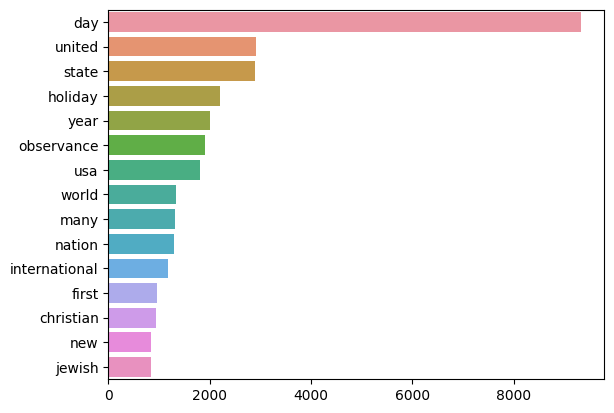

In [38]:
# ===============================
# Most Common Words in Holiday Descriptions
# ===============================

# Combine all cleaned descriptions into one large string and split into words
words = " ".join(df['clean_description']).split()

# Count the most common words
common = Counter(words).most_common(15)

# Plot top 15 words
plt.figure(figsize=(10,6))
sns.barplot(y=[w[0] for w in common], x=[w[1] for w in common], palette="viridis")

plt.title(" Top 15 Most Common Words in Holiday Descriptions")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


In [39]:
# ========================
# Split data into features and target
# ========================
X = df['clean_description']   # Cleaned holiday descriptions
y = df['Type']                # Holiday type (target variable)

# ========================
# Train-test split
# ========================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================
# Text vectorization using TF-IDF
# ========================
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)   # Limit to 3000 most frequent words
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ========================
# Model training: Logistic Regression
# ========================
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)     # Increase iterations for convergence
model.fit(X_train_tfidf, y_train)

# ========================
# Model prediction and evaluation
# ========================
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

                      Christian       0.89      1.00      0.94        91
Christian, Common local holiday       0.00      0.00      0.00         3
           Common local holiday       0.71      0.64      0.68        39
               De facto holiday       0.00      0.00      0.00         7
                         Hebrew       0.88      1.00      0.94       112
                       Hinduism       1.00      0.62      0.77         8
     Hinduism, Optional holiday       0.94      1.00      0.97        33
                  Local holiday       0.81      0.84      0.83       318
       Local holiday, Christian       0.50      1.00      0.67         5
               Local observance       0.95      0.84      0.89       201
    Local observance, Christian       0.56      1.00      0.71         5
                         Muslim       0.89      1.00      0.94        54
               National holiday       0.64      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


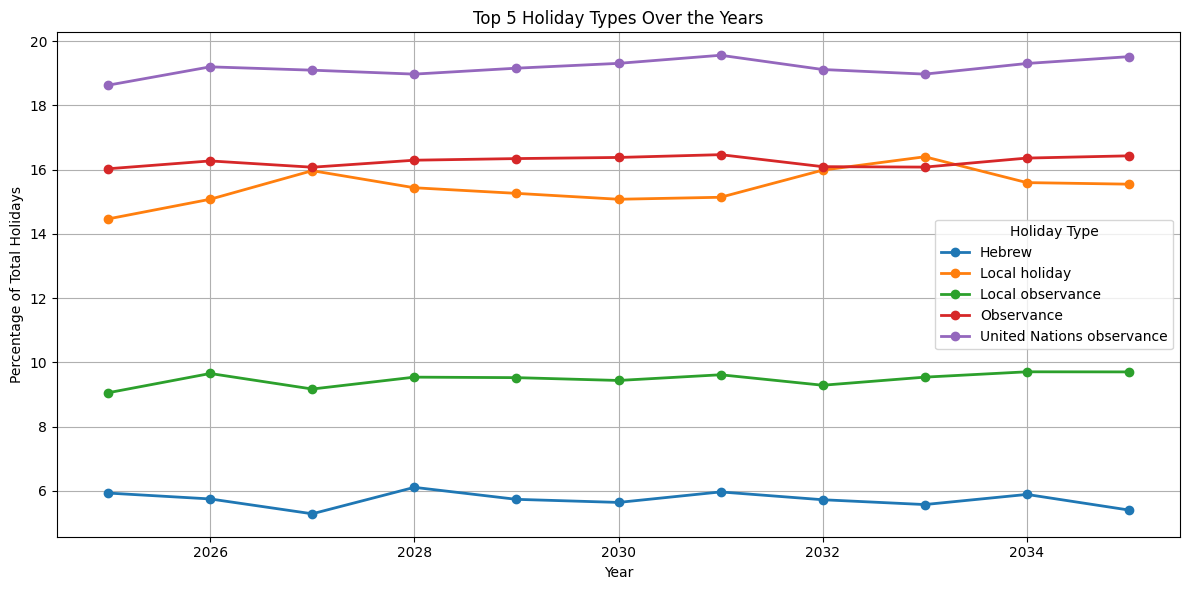

In [44]:
# ========================
#  Top 5 Holiday Types Over the Years
# ========================

# Group by holiday type and get the 5 most frequent types
top_types = yearly_types.groupby('Type')['count'].sum().nlargest(5).index

# Filter the data to include only those top 5 types
filtered = yearly_types[yearly_types['Type'].isin(top_types)]

# ========================
#  Plotting the Trend of Top 5 Holiday Types
# ========================
plt.figure(figsize=(12,6))

# Plot trend line for each holiday type
for t in filtered['Type'].unique():
    subset = filtered[filtered['Type'] == t]
    plt.plot(subset['Year'], subset['percent'], marker='o', linewidth=2, label=t)

# ========================
#  Chart Formatting
# ========================
plt.title('Top 5 Holiday Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Holidays')
plt.legend(title='Holiday Type')
plt.grid(True)
plt.tight_layout()
plt.show()


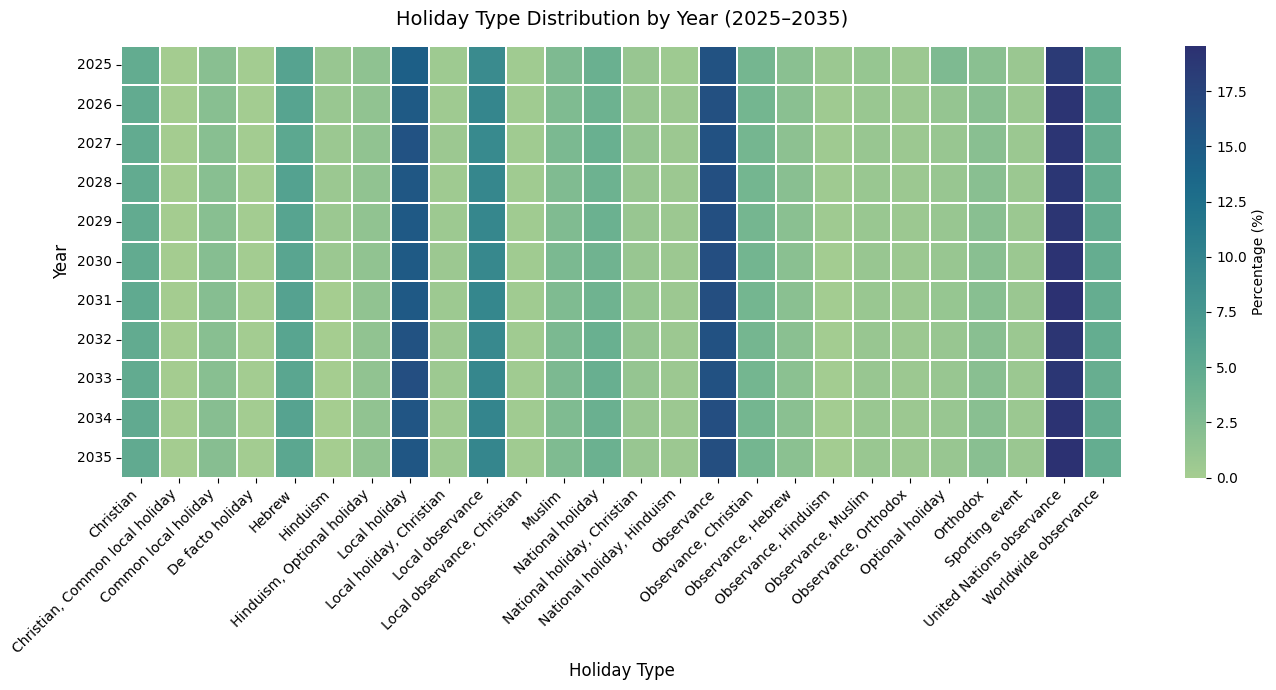

In [46]:
# ========================
#  Holiday Type Distribution Heatmap (2025–2035)
# ========================

# Pivot the data to create a matrix of Year vs. Holiday Type
pivot = yearly_types.pivot(index='Year', columns='Type', values='percent').fillna(0)

# ========================
#  Create the Heatmap
# ========================
plt.figure(figsize=(14,7))

sns.heatmap(
    pivot,
    cmap='crest',           # Color palette for the heatmap
    annot=False,            # Disable cell annotations
    linewidths=0.3,         # Add small borders between cells
    cbar_kws={'label': 'Percentage (%)'}  # Label for the color bar
)

# ========================
# ️ Chart Titles and Labels
# ========================
plt.title('Holiday Type Distribution by Year (2025–2035)', fontsize=14, pad=15)
plt.xlabel('Holiday Type', fontsize=12)
plt.ylabel('Year', fontsize=12)

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# ========================
#  Final Layout
# ========================
plt.tight_layout()
plt.show()


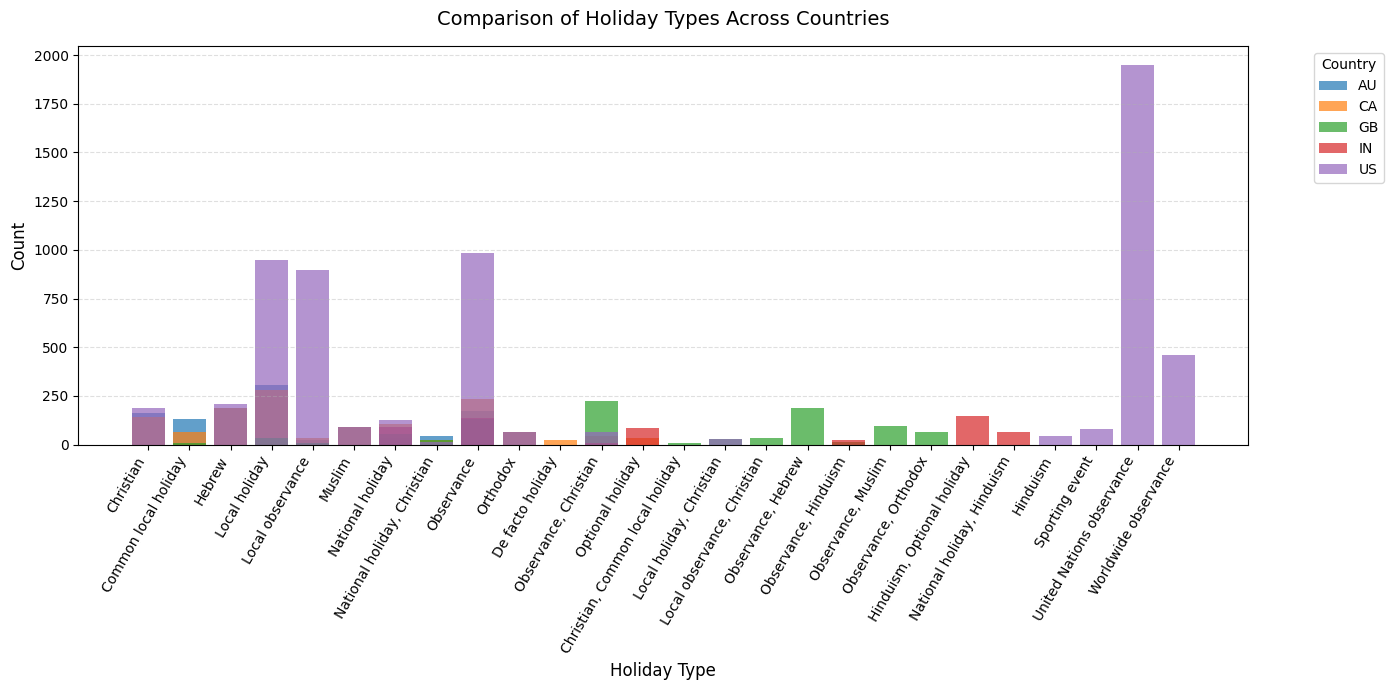

In [51]:
# ========================
#  Comparison of Holiday Types Across Countries
# ========================

# Create a figure for the bar chart
plt.figure(figsize=(14,7))

# ========================
#  Plot Holiday Counts by Type for Each Country
# ========================
for country in type_by_country['Country'].unique():
    subset = type_by_country[type_by_country['Country'] == country]
    plt.bar(subset['Type'], subset['count'], alpha=0.7, label=country)

# ========================
#  Chart Titles and Labels
# ========================
plt.title('Comparison of Holiday Types Across Countries', fontsize=14, pad=15)
plt.xlabel('Holiday Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend outside the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# ========================
# Axis Formatting
# ========================
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adjust layout to fit labels and legend
plt.tight_layout()
plt.show()


# 🏁 Conclusion

In this project, we successfully combined NLP and Time Series Analysis to study global holiday data.

Key takeaways:
- Holiday types vary significantly across countries and over time  
- Religious and national holidays show distinctive yearly trends  
- Semantic similarity analysis revealed cultural closeness between countries based on their holiday descriptions  

Future work could involve:
- Using deep learning models like BERT or GPT for more advanced classification  
- Incorporating socio-economic or cultural indicators to enrich the analysis